<a href="https://colab.research.google.com/github/MWFK/Machine-Learning-From-Zero-to-Hero/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian process classification (GPC) on iris dataset

This example illustrates the predicted probability of GPC for an isotropic and anisotropic RBF kernel on a two-dimensional version for the iris-dataset. The anisotropic RBF kernel obtains slightly higher log-marginal-likelihood by assigning different length-scales to the two feature dimensions.

https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpc_iris.html?highlight=iris%20classification

# Import Libs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Import Data

In [3]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = np.array(iris.target, dtype=int)

# Classifiers 

In [4]:
# Radial Basis Kernel is a kernel function that is used in machine learning to find a non-linear classifier or regression line.
kernel = 1.0 * RBF([1.0])
# isotropic means having identical values of a property in all directions.
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
#  different value when measured in different directions.
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# Create a grid for the data

In [5]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Visualization of the result

Automatically created module for IPython interactive environment


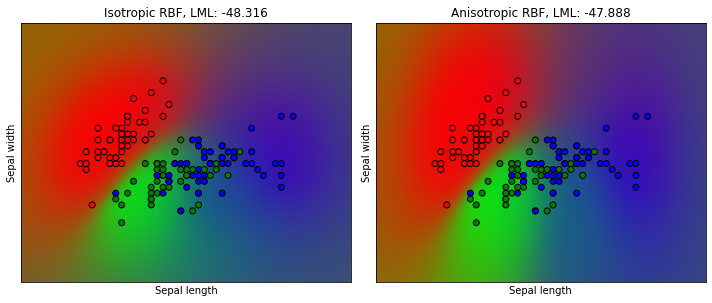

In [1]:
titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))

for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y],
                edgecolors=(0, 0, 0))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("%s, LML: %.3f" %
              (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta)))

plt.tight_layout()
plt.show()